# House Prices - Análise

previsão de preço das casas

[https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

In [66]:
# importar o pandas e numpy
import pandas as pd
import numpy as np

In [67]:
tabela = pd.read_csv('train.csv')
tabela.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [68]:
test = pd.read_csv('test.csv')
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [69]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [70]:
tabela.drop(coluna, axis=1, inplace=True)

In [71]:
test.drop(coluna, axis=1, inplace=True)

In [72]:
tabela.isnull().sum().sort_values(ascending=False).head(19)

GarageType      81
GarageCond      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
PavedDrive       0
WoodDeckSF       0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

In [73]:
tabela.fillna(-1, inplace=True)

In [74]:
test.fillna(-1, inplace=True)

In [75]:
tabela.isnull().sum().sort_values(ascending=False).head(19)

Id              0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageType      0
GarageFinish    0
dtype: int64

In [76]:
tabela.head(3)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500


In [77]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [78]:
tabela.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.111644,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.734517,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [79]:
tabela.to_csv('train_tratado.csv', index=False)

In [80]:
test.to_csv('test_tratado.csv', index=False)

In [81]:
tabela = pd.read_csv('train_tratado.csv')
tabela.head(3)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500


In [82]:
lista1 = ['SalePrice']
lista2 = ['SalePrice']
lista3 = ['SalePrice']
lista4 = ['SalePrice']
lista5 = ['SalePrice']
lista6 = ['SalePrice']
lista7 = ['SalePrice']
lista8 = ['SalePrice']

In [83]:
for i, coluna in enumerate(tabela.columns):
    if i < 10:
        lista1.append(coluna)
    elif i >= 10 and i < 20:
        lista2.append(coluna)
    elif i >= 20 and i < 30:
        lista3.append(coluna)
    elif i >= 30 and i < 40:
        lista4.append(coluna)
    elif i >= 40 and i < 50:
        lista5.append(coluna)
    elif i >= 50 and i < 60:
        lista6.append(coluna)
    elif i >= 60 and i < 70:
        lista7.append(coluna)
    elif i >= 70 and i < 74:
        lista8.append(coluna)
    

In [84]:
print(lista1)
print()
print(lista2)
print()
print(lista3)
print()
print(lista4)
print()
print(lista5)
print()
print(lista6)
print()
print(lista7)
print()
print(lista8)

['SalePrice', 'Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope']

['SalePrice', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle']

['SalePrice', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond']

['SalePrice', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir']

['SalePrice', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']

['SalePrice', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea']

['SalePrice', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '

In [85]:
tabela1 = tabela[lista1]
tabela1.head(3)

,SalePrice,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope
0,208500,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl
1,181500,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl
2,223500,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl


In [86]:
tabela2 = tabela[lista2]
tabela2.head(3)

,SalePrice,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle
0,208500,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable
1,181500,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable
2,223500,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable


In [87]:
tabela3 = tabela[lista3]
tabela3.head(3)

,SalePrice,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond
0,208500,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA
1,181500,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA
2,223500,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA


In [88]:
tabela4 = tabela[lista4]
tabela4.head(3)

,SalePrice,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir
0,208500,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y
1,181500,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y
2,223500,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y


In [89]:
tabela5 = tabela[lista5]
tabela5.head(3)

,SalePrice,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
0,208500,SBrkr,856,854,0,1710,1,0,2,1,3
1,181500,SBrkr,1262,0,0,1262,0,1,2,0,3
2,223500,SBrkr,920,866,0,1786,1,0,2,1,3


In [90]:
tabela6 = tabela[lista6]
tabela6.head(3)

,SalePrice,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea
0,208500,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548
1,181500,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460
2,223500,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608


In [91]:
tabela7 = tabela[lista7]
tabela7.head(3)

,SalePrice,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,208500,TA,TA,Y,0,61,0,0,0,0,0
1,181500,TA,TA,Y,298,0,0,0,0,0,0
2,223500,TA,TA,Y,0,42,0,0,0,0,0


In [92]:
tabela8 = tabela[lista8]
tabela8.head(3)

,SalePrice,MoSold,YrSold,SaleType,SaleCondition
0,208500,2,2008,WD,Normal
1,181500,5,2007,WD,Normal
2,223500,9,2008,WD,Normal


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

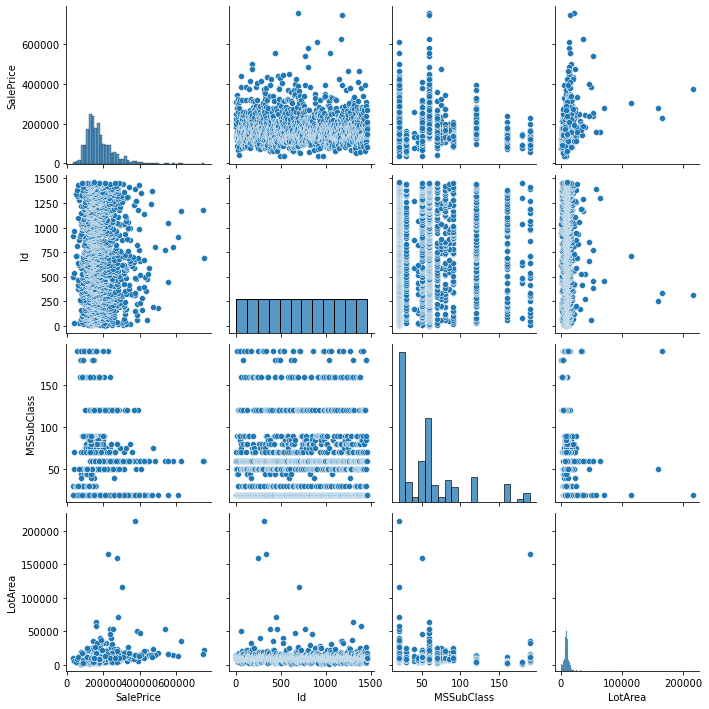

In [94]:
sns.pairplot(tabela1)
plt.show()

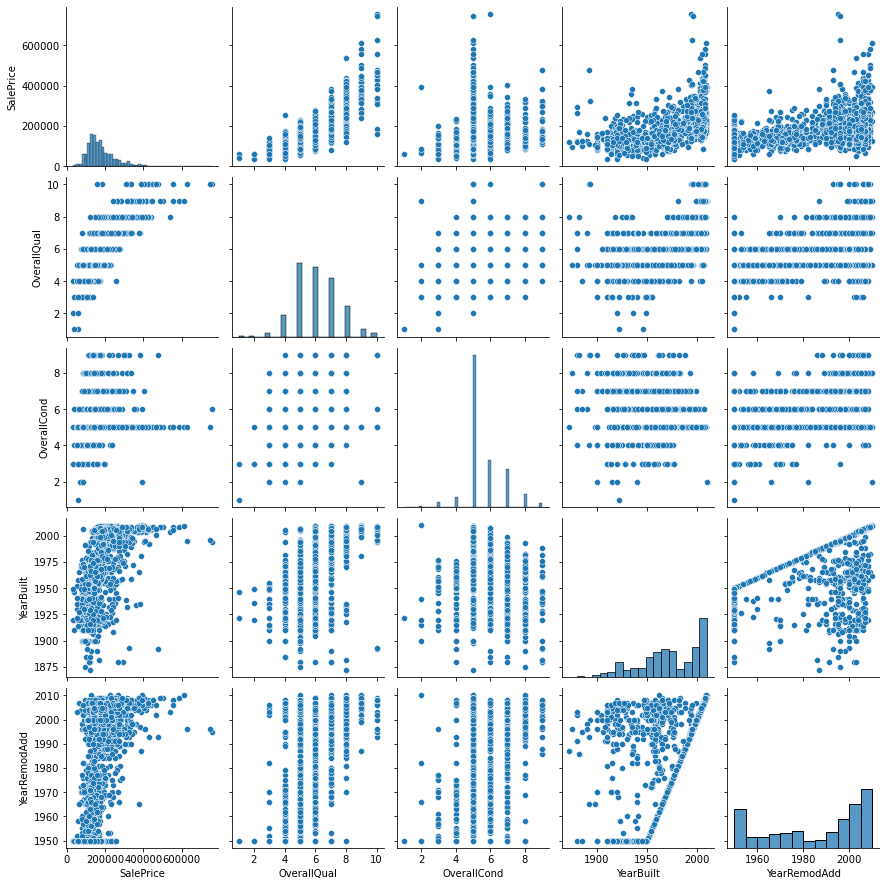

In [95]:
sns.pairplot(tabela2)
plt.show()

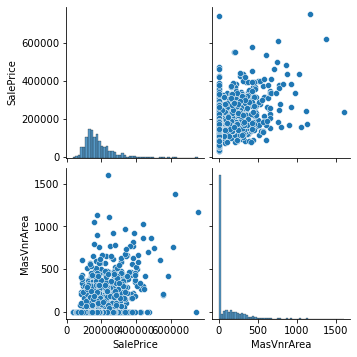

In [96]:
sns.pairplot(tabela3)
plt.show()

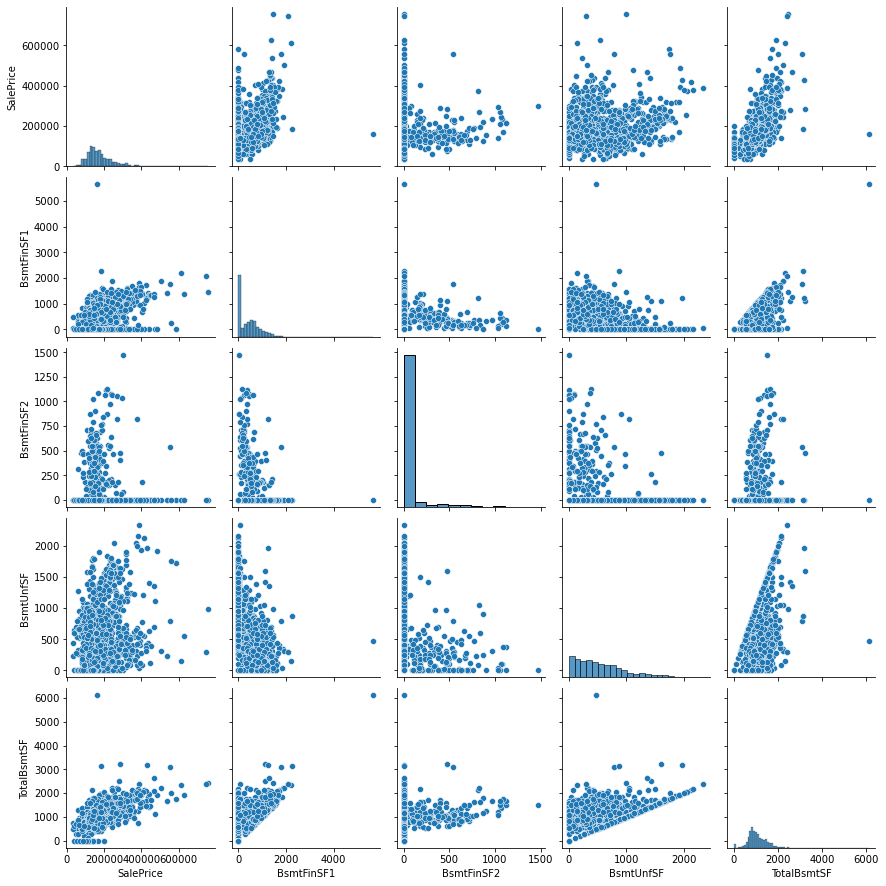

In [97]:
sns.pairplot(tabela4)
plt.show()

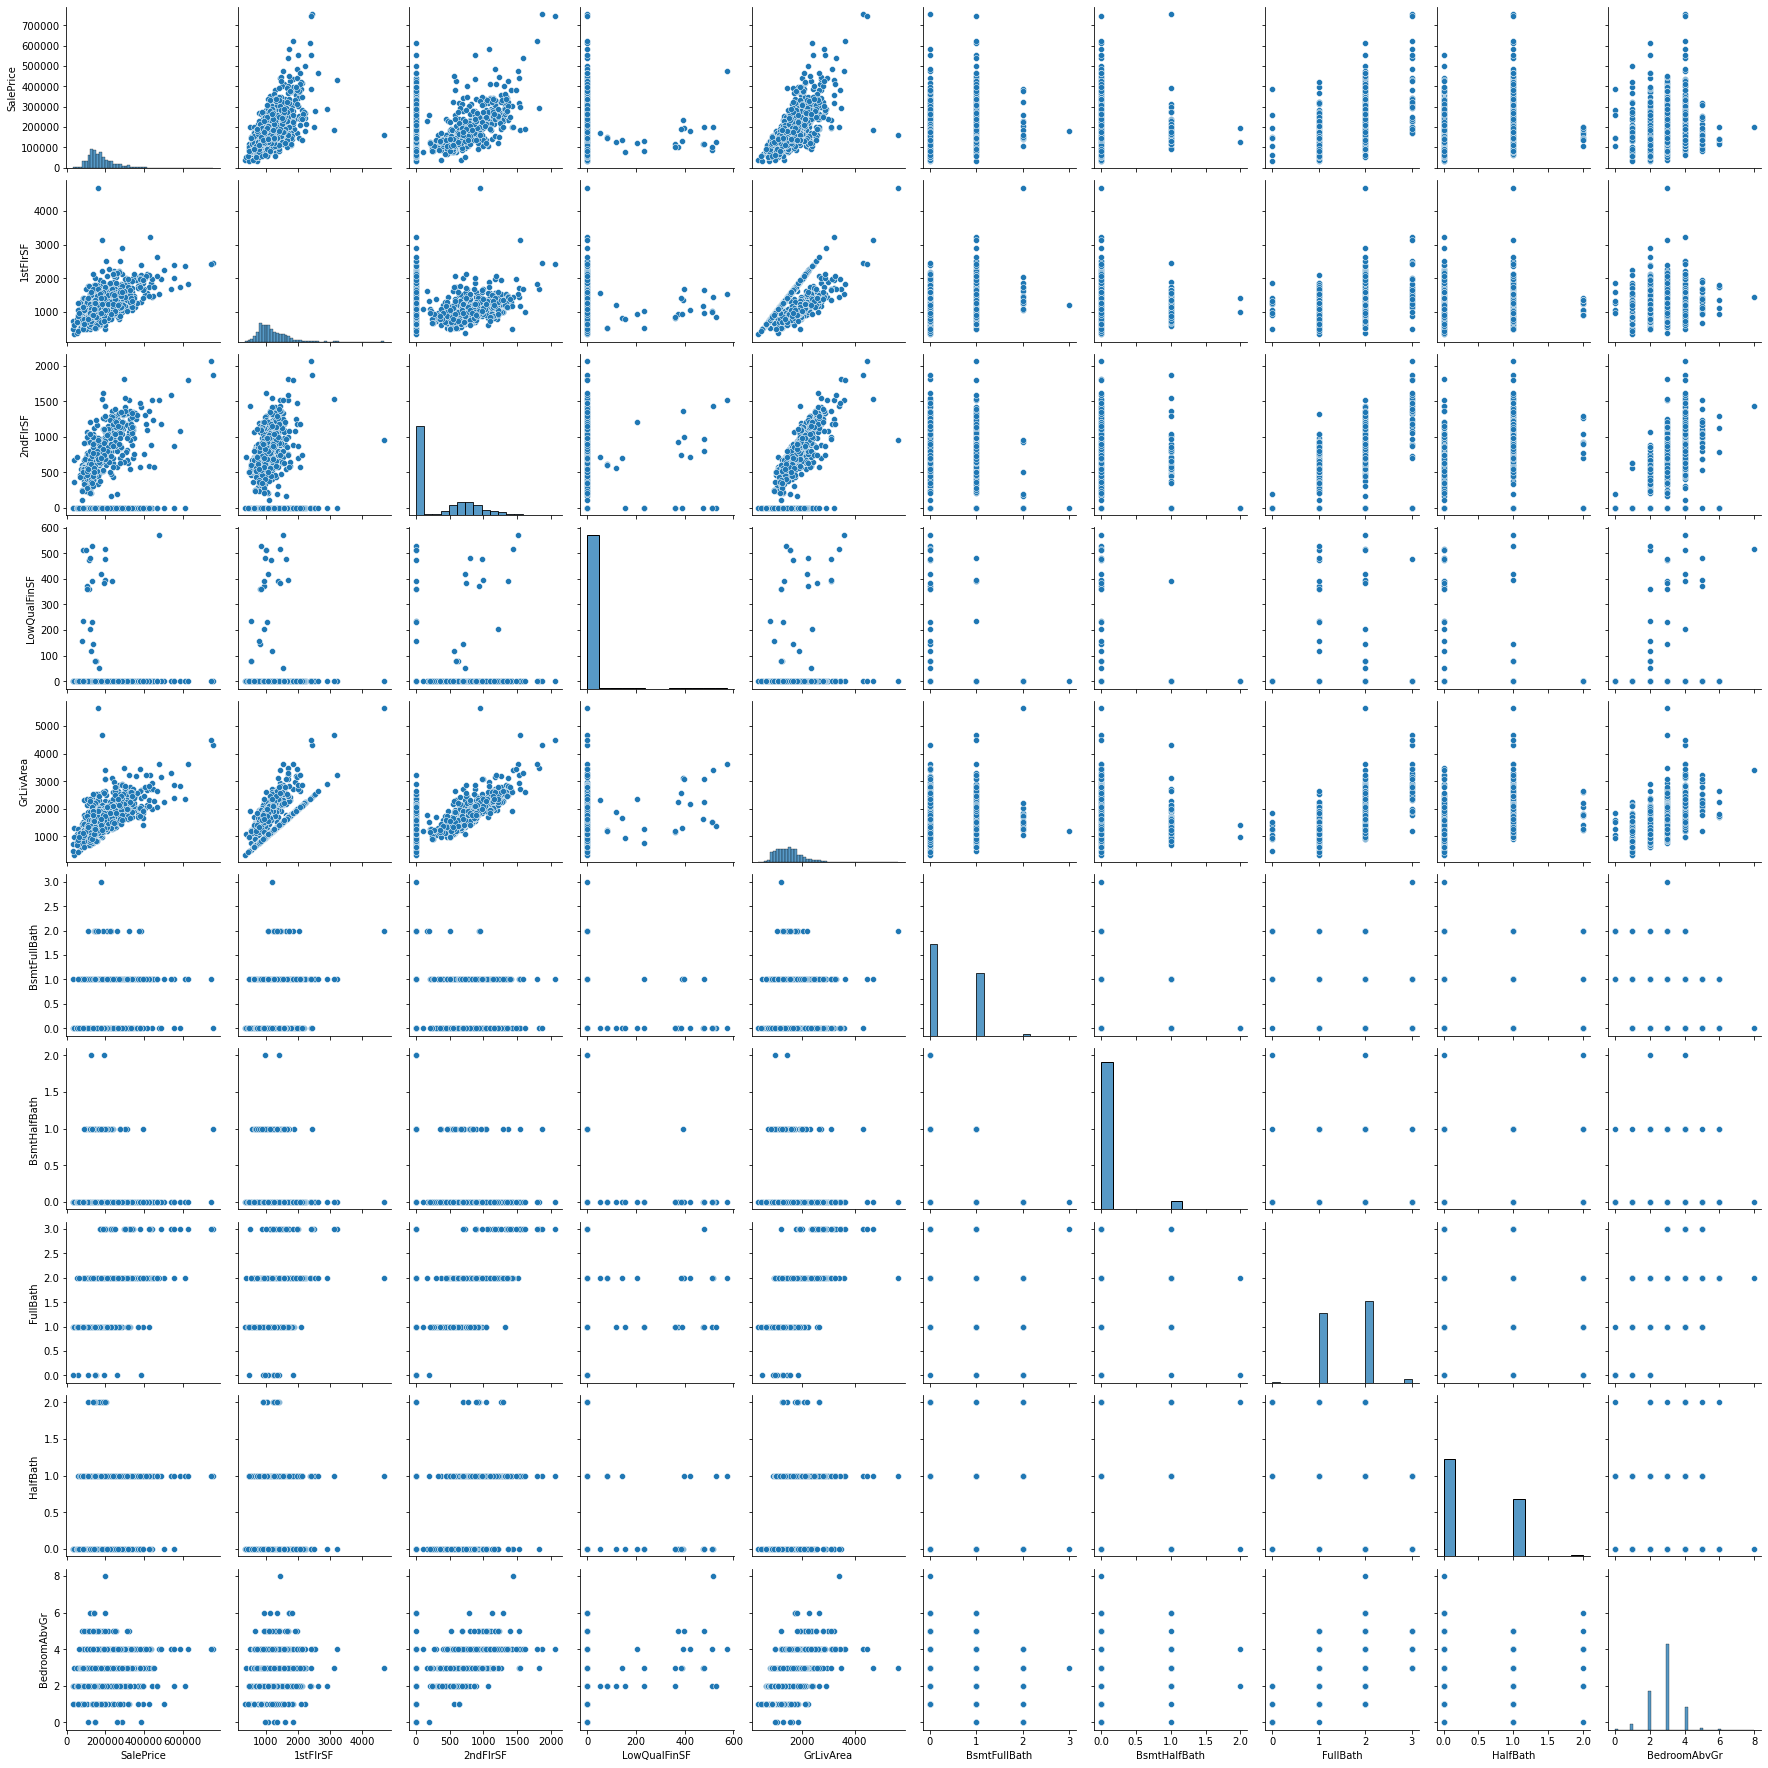

In [98]:
sns.pairplot(tabela5)
plt.show()

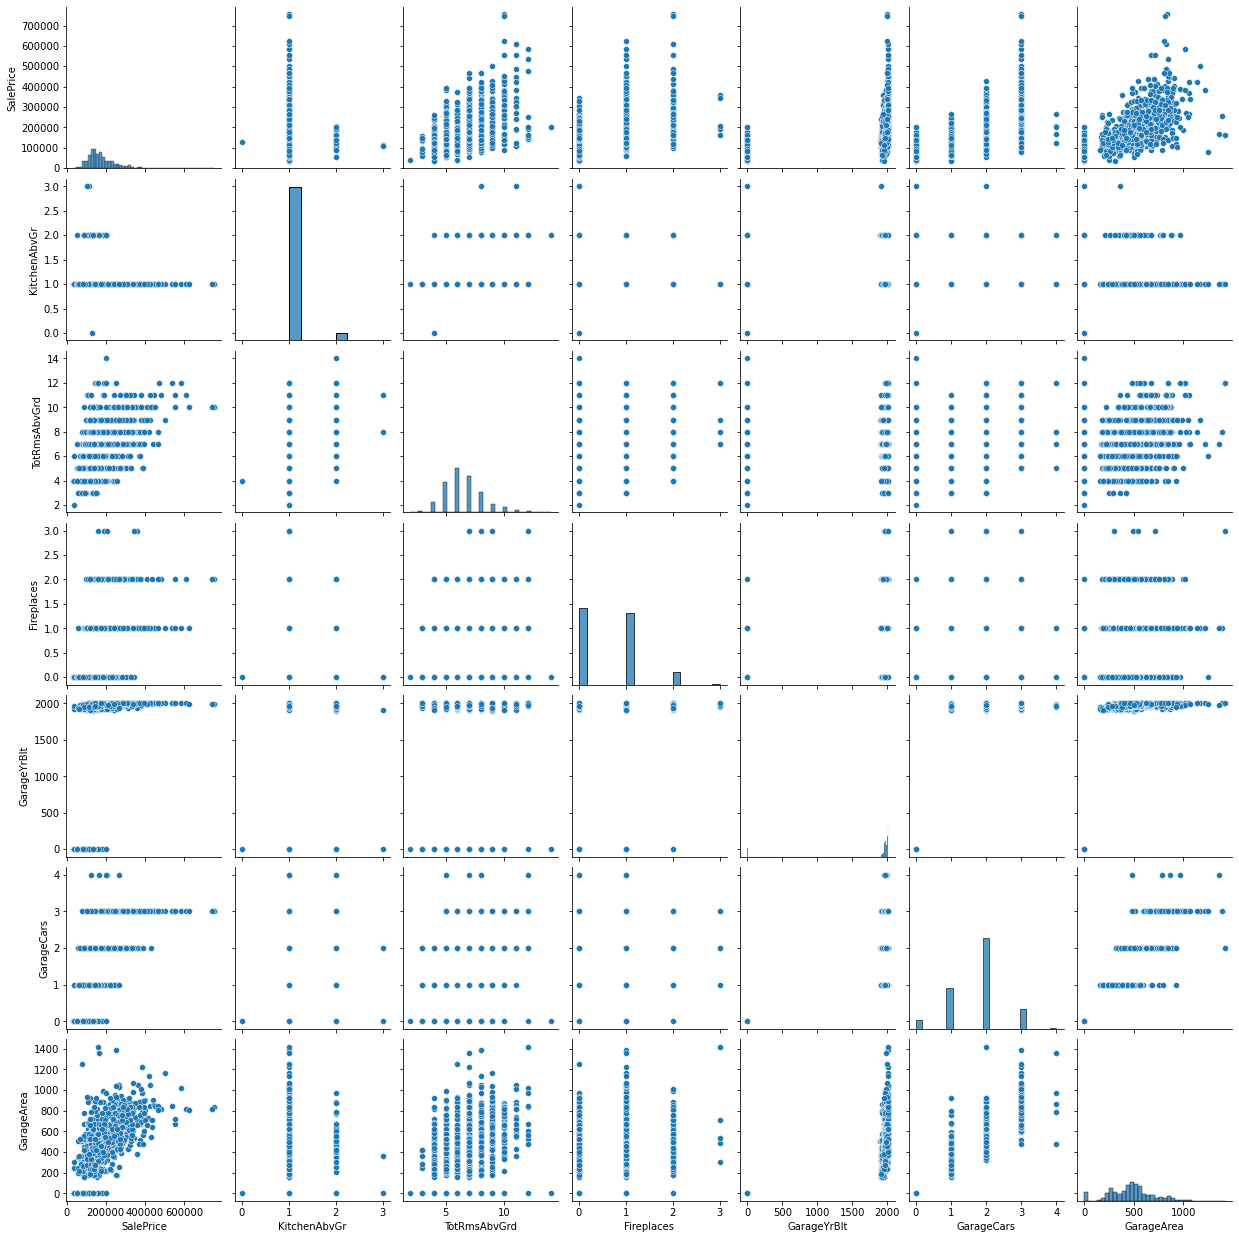

In [99]:
sns.pairplot(tabela6)
plt.show()

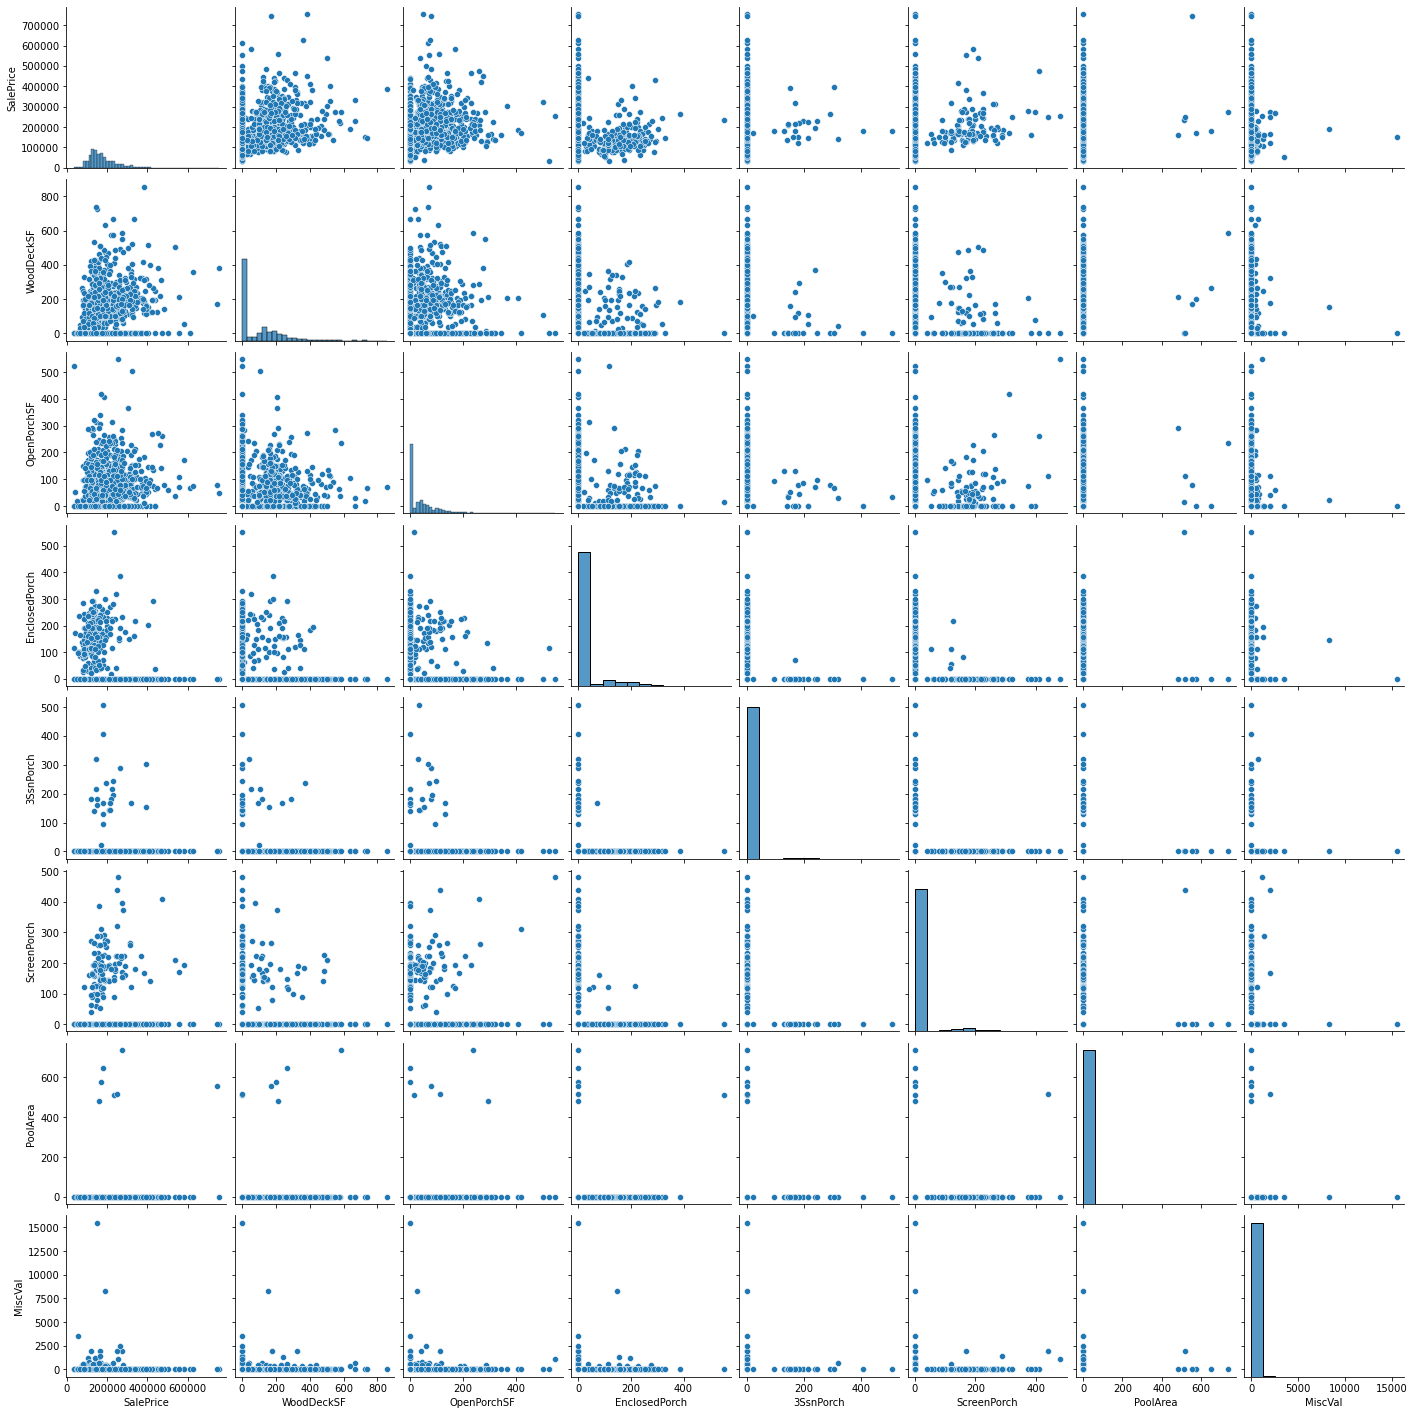

In [100]:
sns.pairplot(tabela7)
plt.show()

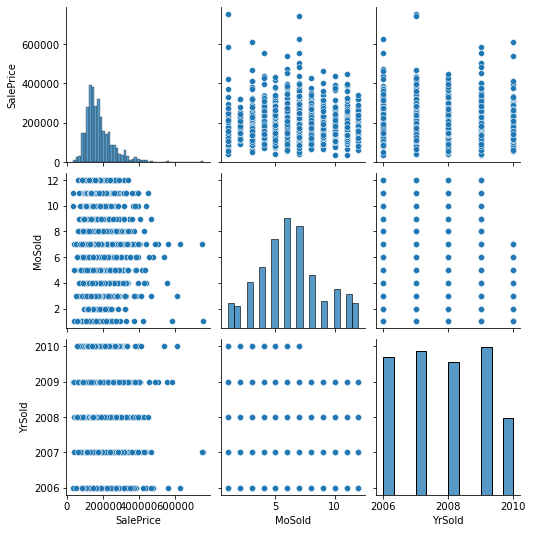

In [101]:
sns.pairplot(tabela8)
plt.show()

In [102]:
import scipy.stats as stats

In [103]:
col = tabela.columns[tabela.dtypes != 'object']

In [104]:
tabela_num = tabela[col]

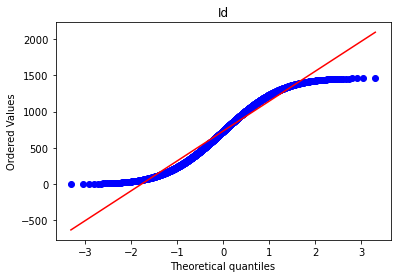

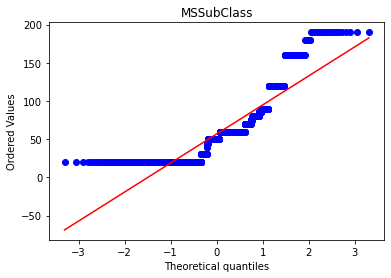

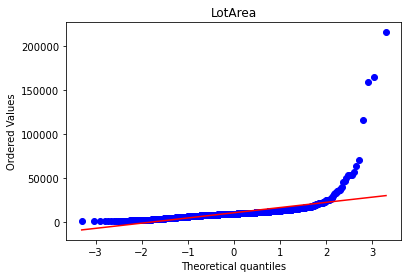

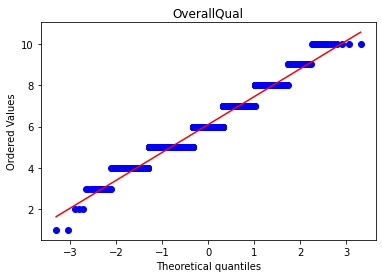

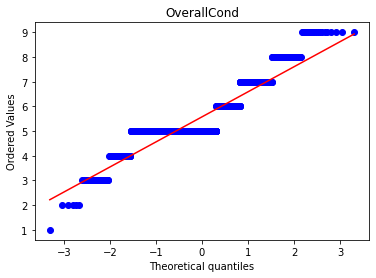

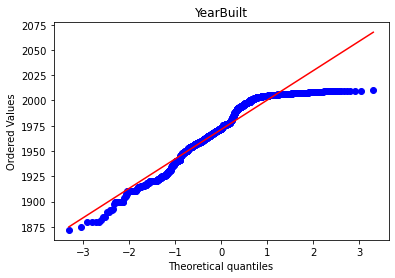

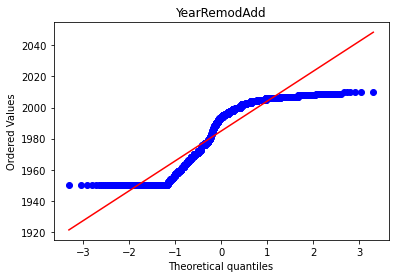

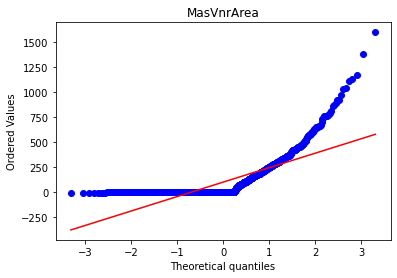

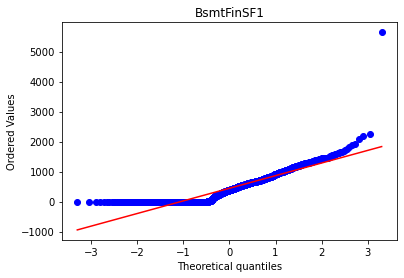

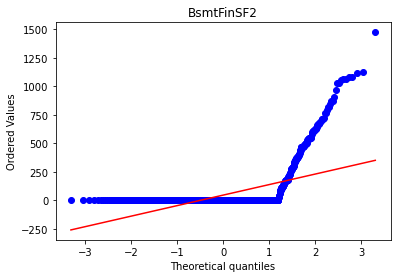

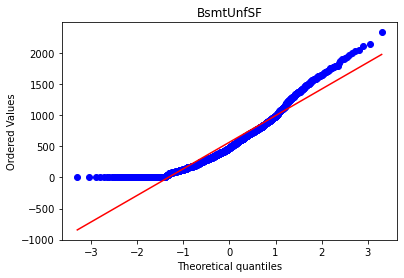

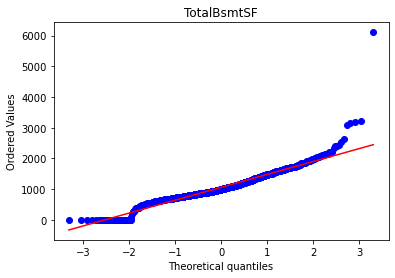

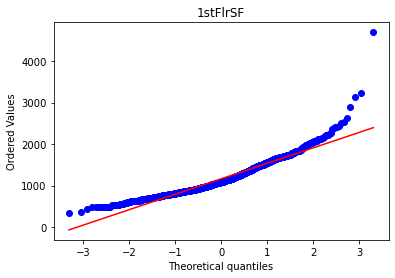

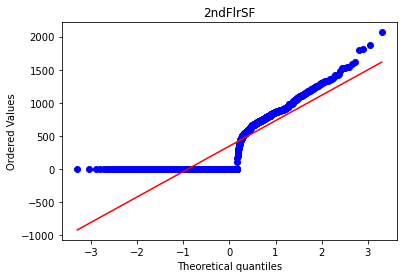

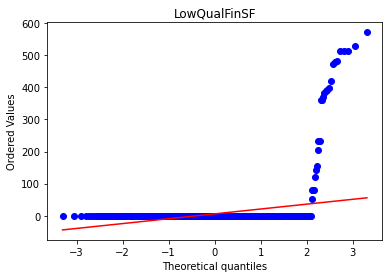

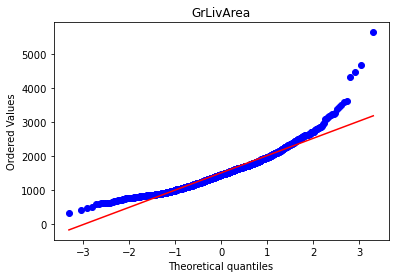

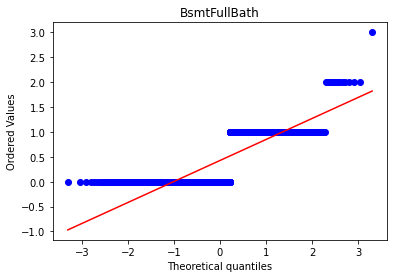

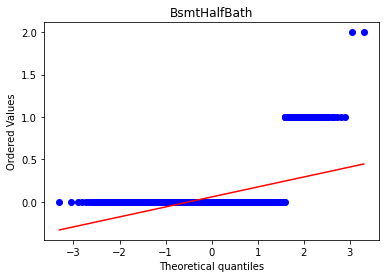

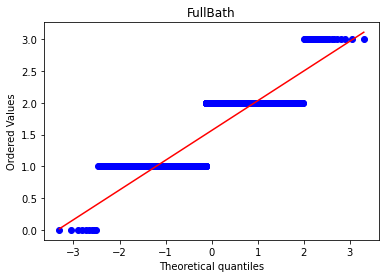

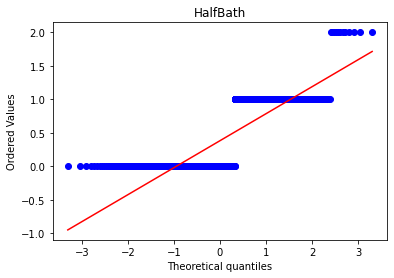

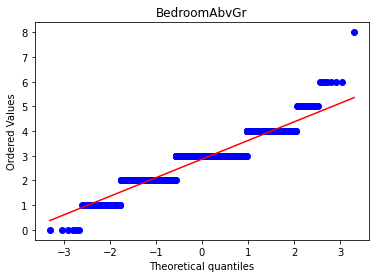

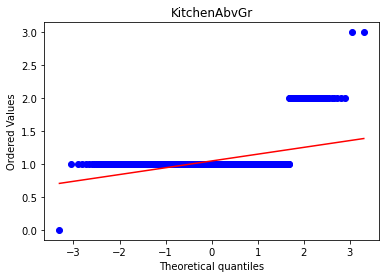

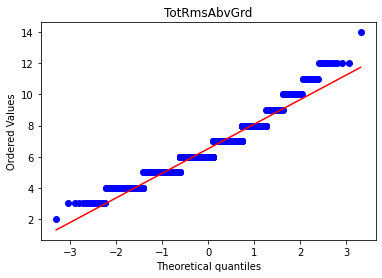

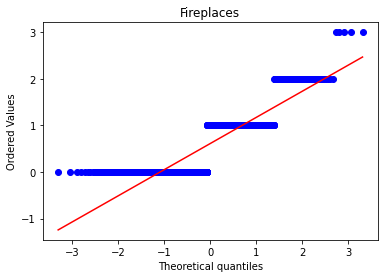

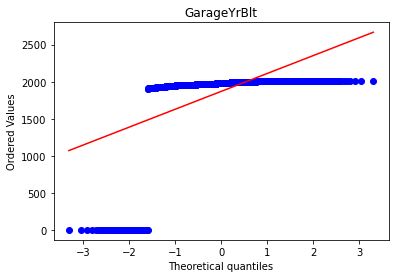

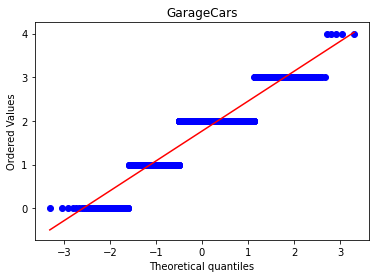

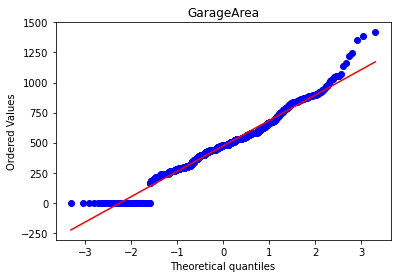

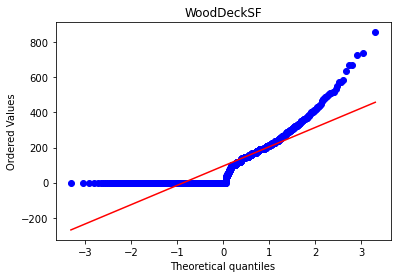

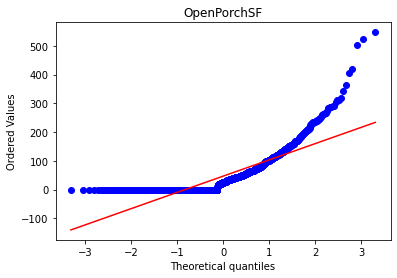

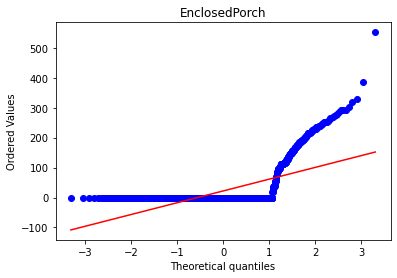

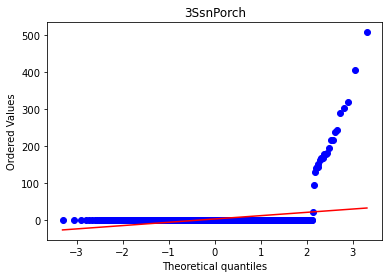

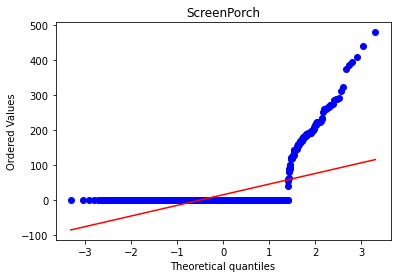

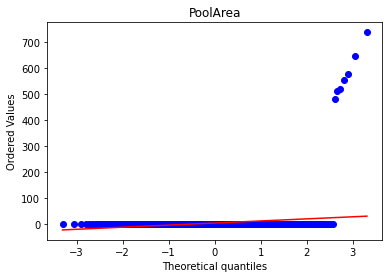

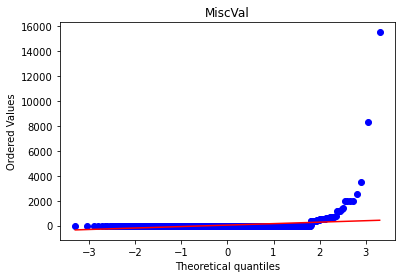

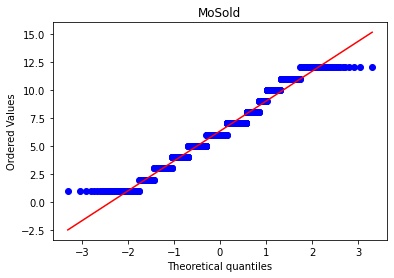

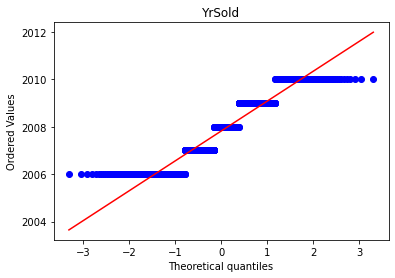

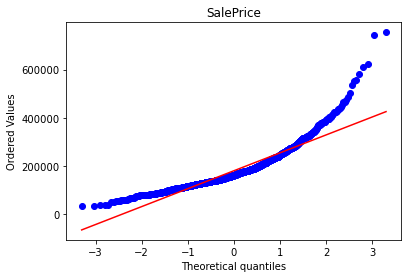

In [105]:
for coluna in tabela_num.columns:
    stats.probplot(tabela_num[coluna], dist='norm', plot=plt)
    plt.title(coluna)
    plt.show()

In [106]:
for coluna in tabela_num.columns:
    print(stats.shapiro(tabela[coluna]))
    print('-'*100)

ShapiroResult(statistic=0.9548455476760864, pvalue=7.979264493054235e-21)
----------------------------------------------------------------------------------------------------
ShapiroResult(statistic=0.8045679926872253, pvalue=9.105928891263241e-39)
----------------------------------------------------------------------------------------------------
ShapiroResult(statistic=0.3510589599609375, pvalue=0.0)
----------------------------------------------------------------------------------------------------
ShapiroResult(statistic=0.9480105638504028, pvalue=2.6899265770757965e-22)
----------------------------------------------------------------------------------------------------
ShapiroResult(statistic=0.8289263248443604, pvalue=6.778475726002203e-37)
----------------------------------------------------------------------------------------------------
ShapiroResult(statistic=0.9255972504615784, pvalue=2.7700502478701884e-26)
-------------------------------------------------------------------

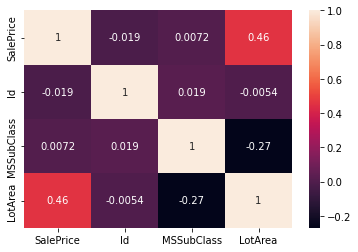

In [107]:
sns.heatmap(tabela1.corr(method='spearman'), annot=True)
plt.show()

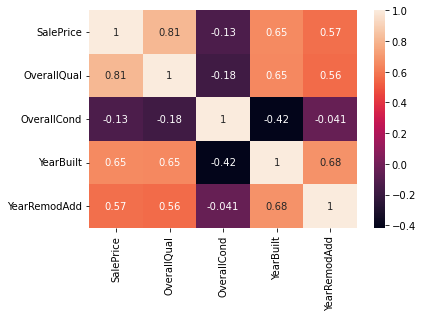

In [108]:
sns.heatmap(tabela2.corr(method='spearman'), annot=True)
plt.show()

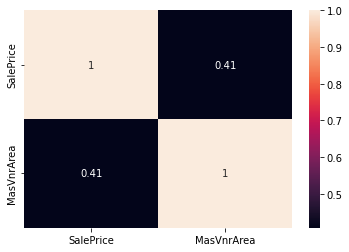

In [109]:
sns.heatmap(tabela3.corr(method='spearman'), annot=True)
plt.show()

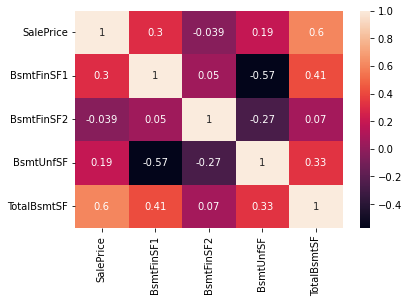

In [110]:
sns.heatmap(tabela4.corr(method='spearman'), annot=True)
plt.show()

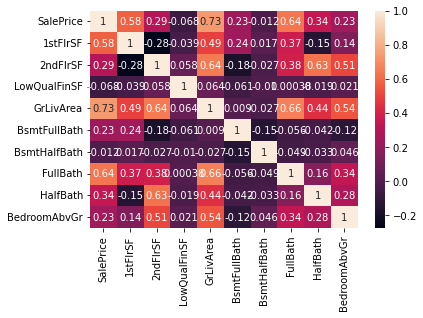

In [111]:
sns.heatmap(tabela5.corr(method='spearman'), annot=True)
plt.show()

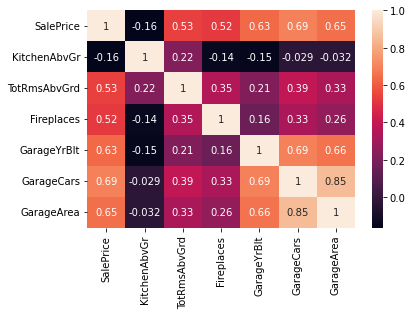

In [112]:
sns.heatmap(tabela6.corr(method='spearman'), annot=True)
plt.show()

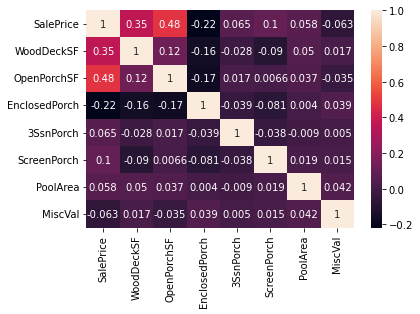

In [113]:
sns.heatmap(tabela7.corr(method='spearman'), annot=True)
plt.show()

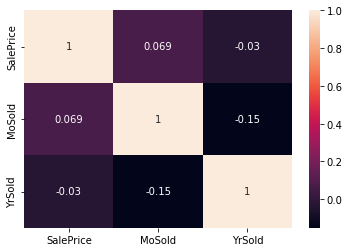

In [114]:
sns.heatmap(tabela8.corr(method='spearman'), annot=True)
plt.show()

In [115]:
tabela6.head(2)

,SalePrice,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea
0,208500,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548
1,181500,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460


## Resumo

### Colunas com alta correlação

* MSSubClass
* OverallCond
* LotArea
* OverallQual - 0.81
* MasVnArea - alta correlação
* BsmtFinSF1
* BsmtFinSF2
* BsmtUnfSF
* 1stFlrSF - 0.58
* 2ndFlrSF
* LowQualFinSF
* BsmtFullBath
* BsmtHalfBath
* HalfBath
* BedroomAbvGr
* KitchenAbvGr - alta correlação
* TotRmsAbvGrd
* Fireplaces - 0.52
* GarageQual
* GarageCond
* PavedDrive
* WoodDeckSF
* OpenPorchSF
* EnclosedPorch - alta correlação
* 3SsnPorch
* ScreenPorch
* PoolArea
* MiscVal
* MoSold
* YrSold - alta correlação
----------------------------------
* YearBuilt - 0.65
* YearRemodAdd - 0.57
* TotalBsmtSF - 0.60
* FullBath - 0.64
* GrLivArea - 0.73
* TotRmsAbvGrd - 0.53
* GarageYrBlt - 0.63
* GarageCars - 0.69
* GarageArea - 0.65

## Modelos para regressão

* 1ª Fase - modelo feito com todos os dados numérico
---
* 2ª Fase - MSSubClass, OverallCond, LotArea, OverallQual, MasVnArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold
---
* 3ª Fase - MasVnArea, KitchenAbvGr, EnclosedPorch, YrSold
---
* 4ª Fase - OverallQual, 1stFlrSF, Fireplaces, YearBuilt, YearRemodAdd, TotalBsmtSF, FullBath, GrLivArea, TotRmsAbvGrd, GarageYrBlt, GarageCars, GarageArea
---
* 5ª Fase - OverallQual